# TensorFlow Regression Example

## Creating Data

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# 1 Million Points
x_data = np.linspace(0.0,10.0,1000000)

In [0]:
noise = np.random.randn(len(x_data))

In [0]:
# y = mx + b + noise_levels
b = 10

y_true =  (2.5 * x_data ) + 15 + noise

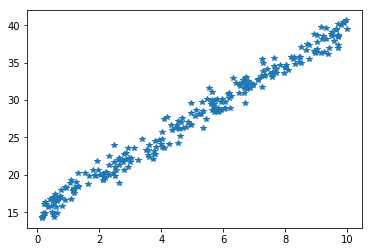

In [0]:
sample_indx = np.random.randint(len(x_data),size=(250))
plt.plot(x_data[sample_indx],y_true[sample_indx],'*')

# Tensorflow 2.0

In [0]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

TensorFlow 2.x selected.


In [0]:
import tensorflow as tf

In [0]:
BATCH_SIZE = 1000
BATCHS = 10000

display_step = 100

In [0]:
w = tf.Variable(initial_value=0.)
b = tf.Variable(initial_value=0.)

In [0]:
def next_batch(x_data, batch_size):
    batch_index = np.random.randint(len(x_data),size=(BATCH_SIZE))
    x_train = x_data[batch_index]
    y_train = y_true[batch_index]
    return x_train, y_train

In [0]:
optimizer = tf.keras.optimizers.SGD(learning_rate= 1e-3)

In [0]:
for step in range(BATCHS):
  x_train, y_train = next_batch(x_data, BATCH_SIZE)
  with tf.GradientTape() as tape:
    y_pred = w * x_train + b
    loss = tf.reduce_sum(tf.square(y_pred - y_train))/(BATCH_SIZE)
  
  grads = tape.gradient(loss, [w, b])
  optimizer.apply_gradients(grads_and_vars=zip(grads,[w,b]))
  
  if (step + 1) % display_step == 0 or step == 0:
    print("Step : {}, loss : {} , w : {}, b : {}".format(step, loss.numpy(), w.numpy(), b.numpy()))

Step : 0, loss : 814.6525268554688 , w : 0.3209573030471802, b : 0.055150147527456284
Step : 99, loss : 45.239585876464844 , w : 4.554308891296387, b : 1.3886845111846924
Step : 199, loss : 45.4139518737793 , w : 4.453917026519775, b : 2.040172576904297
Step : 299, loss : 40.6907958984375 , w : 4.362486839294434, b : 2.658822536468506
Step : 399, loss : 36.635555267333984 , w : 4.280228137969971, b : 3.248326063156128
Step : 499, loss : 31.41555404663086 , w : 4.196402549743652, b : 3.808826446533203
Step : 599, loss : 29.40784454345703 , w : 4.1095871925354, b : 4.3405046463012695
Step : 699, loss : 24.84896469116211 , w : 4.036120414733887, b : 4.852463722229004
Step : 799, loss : 23.658432006835938 , w : 3.9541208744049072, b : 5.333377361297607
Step : 899, loss : 21.810272216796875 , w : 3.8898608684539795, b : 5.796113014221191
Step : 999, loss : 20.085176467895508 , w : 3.825533390045166, b : 6.235480308532715
Step : 1099, loss : 19.29035186767578 , w : 3.768279552459717, b : 6.6

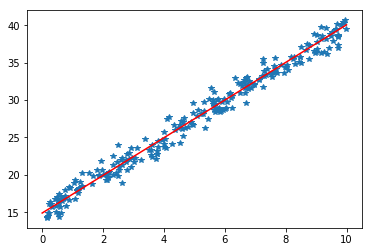

In [0]:
plt.plot(x_data[sample_indx],y_true[sample_indx],'*')
plt.plot(x_data, w.numpy()*x_data+b.numpy(),'r')

# TF Eager Execution


In [0]:
import tensorflow as tf

In [0]:
# Set Eager API
tf.enable_eager_execution()
tfe = tf.contrib.eager

In [0]:
BATCH_SIZE = 1000
BATCHS = 10000

In [0]:
def next_batch(x_data, batch_size):
    batch_index = np.random.randint(len(x_data),size=(BATCH_SIZE))
    x_train = x_data[batch_index]
    y_train = y_true[batch_index]
    return x_train, y_train

**Variables**

In [0]:
w_tfe = tf.Variable(np.random.uniform())
b_tfe = tf.Variable(np.random.uniform(1,10))

**Linear regression function**

In [0]:
# Linear regression (Wx + b)
def linear_regression(inputs):
    return inputs * w_tfe + b_tfe

**Lost function: MS**

In [0]:
def mean_square_fn(model_fn, inputs, labels):
    return tf.reduce_sum(tf.pow(model_fn(inputs) - labels, 2)) / (2 * BATCH_SIZE)

**Optimizer**

In [0]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)

grad = tfe.implicit_gradients(mean_square_fn)

In [0]:
# Initial cost
x_train, y_train = next_batch(x_data, BATCH_SIZE)
print("Initial cost= {:.9f}".format(
    mean_square_fn(linear_regression, x_train, y_train)),
    "W=", w_tfe.numpy(), "b=", b_tfe.numpy())

Initial cost= 301.666534424 W= 0.29334104 b= 2.6102347


**Training**

In [0]:
# Training
display_step = 100
for step in range(BATCHS):
    
    x_train, y_train = next_batch(x_data, BATCH_SIZE)
    optimizer.apply_gradients(grad(linear_regression, x_train, y_train))

    if (step + 1) % display_step == 0 or step == 0:
        print("Epoch:", '%04d' % (step + 1), "cost=",
              "{:.9f}".format(mean_square_fn(linear_regression, x_train, y_train)),
              "W=", w_tfe.numpy(), "b=", b_tfe.numpy())


Epoch: 0001 cost= 275.481536865 W= 0.42854565 b= 2.6336372
Epoch: 0100 cost= 16.771112442 W= 4.11131 b= 3.4798746
Epoch: 0200 cost= 16.047227859 W= 4.1926284 b= 3.7750118
Epoch: 0300 cost= 15.135506630 W= 4.155428 b= 4.045262
Epoch: 0400 cost= 14.601335526 W= 4.1137743 b= 4.309869
Epoch: 0500 cost= 12.988318443 W= 4.07434 b= 4.5675364
Epoch: 0600 cost= 13.962398529 W= 4.0381775 b= 4.8191485
Epoch: 0700 cost= 11.749617577 W= 3.9993713 b= 5.064703
Epoch: 0800 cost= 11.554651260 W= 3.9644341 b= 5.3054633
Epoch: 0900 cost= 11.580221176 W= 3.928494 b= 5.5401406
Epoch: 1000 cost= 11.125984192 W= 3.8980548 b= 5.770336
Epoch: 1100 cost= 10.007103920 W= 3.862554 b= 5.9936194
Epoch: 1200 cost= 9.616973877 W= 3.8300939 b= 6.2107058
Epoch: 1300 cost= 9.293504715 W= 3.7960896 b= 6.4219265
Epoch: 1400 cost= 9.302433968 W= 3.7648456 b= 6.6274505
Epoch: 1500 cost= 8.918160439 W= 3.7349737 b= 6.8296146
Epoch: 1600 cost= 8.196873665 W= 3.700922 b= 7.025527
Epoch: 1700 cost= 8.114662170 W= 3.6736612 b= 7

**Results**

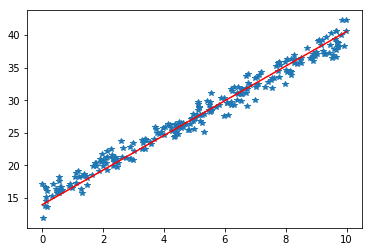

In [0]:
plt.plot(x_data[sample_indx],y_true[sample_indx],'*')
plt.plot(x_data, w_tfe*x_data+b_tfe,'r')